In [1]:
#Importing libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import graphviz


In [2]:
#Constructing the Fat Tree topology
r = 32
n = 1+r+(int(pow(r,2)))
graphs = []

for i in range(r*2):
    graphs.append((nx.full_rary_tree(r = r, n = n),0))
    
U = nx.join(graphs)
    

In [3]:
#Servers in the topology
U_servers = [x for x in U.nodes() if U.degree(x)==1]

In [4]:
#Number of servers
len(U_servers)

65536

In [5]:
#Given Data

Capacity = 10 #Gbit/s
tau_time = 0.000005 #s
L_file = 32000 #Gbit, 4000 GB, -size of the file to which the job is applied
L_out = 32000 #Gbit, 4000 GB, output of the task
E_X_time = 28800 #sec, mean of the random variable
T_0_time = 30 #sec, fixed set-up time of the job running on one server (A)
csi = 0.1 #numerical coefficient
fraction = 48/1500 #fraction of the original data (overhead)
n = 64 #number of ports
s = int((pow(n,3))/4) #number of servers per topology


In [6]:
#Calculating hops between server A and all other server

source = random.choice(U_servers)

U_servers.remove(source)

target = U_servers

hops = []

for i in target:
    hops.append(nx.shortest_path_length(U,source,i))

hops.sort()
hops = np.array(hops)

In [14]:
#function

def response_time_func(C,tau,L_f,L_o,E_X,T_0,f,N,h):
    
    h = h[:N]
    
    E_X_i = E_X/N 
    input_data = L_f/N
    overhead_input = input_data*f
    
    low = 0.0                 
    high = (2*L_o)/N
    
    
    
    #T_i
    T_i = 2 * tau * h
    one_over_T_i = 1/T_i
    sum_one_over_T_j = np.sum(one_over_T_i) 
    
    #tempo esecuzione
    X_i = np.random.exponential(scale = E_X_i, size = N)
    task_time = T_0 + X_i
    theta = np.sum(task_time)
    
    
    #Valutazione size output
    L_o_i = np.random.uniform(low = low, high = high, size = N)
    
    #Overhead output
    overhead_output = L_o_i * f 
    
    #throughput
    tp = C * (one_over_T_i/sum_one_over_T_j)
    
    #valutazione tempo andata
    forward_time = (input_data+overhead_input)/tp
    
    #valutazione tempo ritorno
    return_time = np.divide(np.add(L_o_i,overhead_output),tp)
    
    r_t_1 = np.add(forward_time, task_time)
    r_t = np.add(r_t_1, return_time)
    
    response_time = np.max(r_t)
    
    return(response_time, theta)
    
    

    


In [18]:
#Simulation

num_sim = 100

E_R_list = []
E_theta_list = []




for e in range(1,10000+1):

    num_server = e
    sample_R = []
    sample_theta = []
    
    for i in range(num_sim):
        
        R, th = response_time_func(Capacity,tau_time,L_file,L_out,E_X_time,T_0_time,fraction,num_server,hops)
        sample_R.append(R)
        sample_theta.append(th)
    
    E_R = np.mean(sample_R)
    E_R_list.append(E_R)
    E_theta = np.mean(sample_theta)
    E_theta_list.append(E_theta)


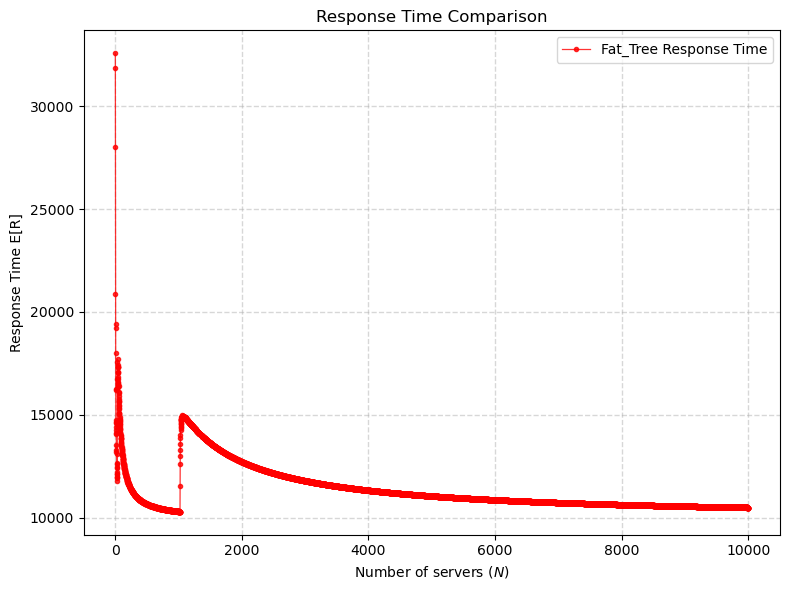

In [19]:
#not normalized plot

x = []

for i in range(1,10000+1):
    x.append(i)
    
plt.figure(figsize = (8,6))
plt.plot(x, E_R_list, '.-', color = 'r', linewidth=0.9, alpha=0.8, label='Fat_Tree Response Time')
plt.title("Response Time Comparison")
plt.xlabel("Number of servers ($N$)")
plt.ylabel("Response Time E[R]")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

#plt.ylim(10000, 25000)
# Aggiungi legenda
plt.legend(loc='upper right')

# Mostra il grafico
plt.tight_layout()
plt.show()



In [21]:
#R_baseline
num_sim = 100
sample_R_baseline = []

for i in range(num_sim):
    #execution time
    X = np.random.exponential(scale = E_X_time)
    server_time = T_0_time + X
    sample_R_baseline.append(server_time)
    
E_R_baseline = np.mean(sample_R_baseline)


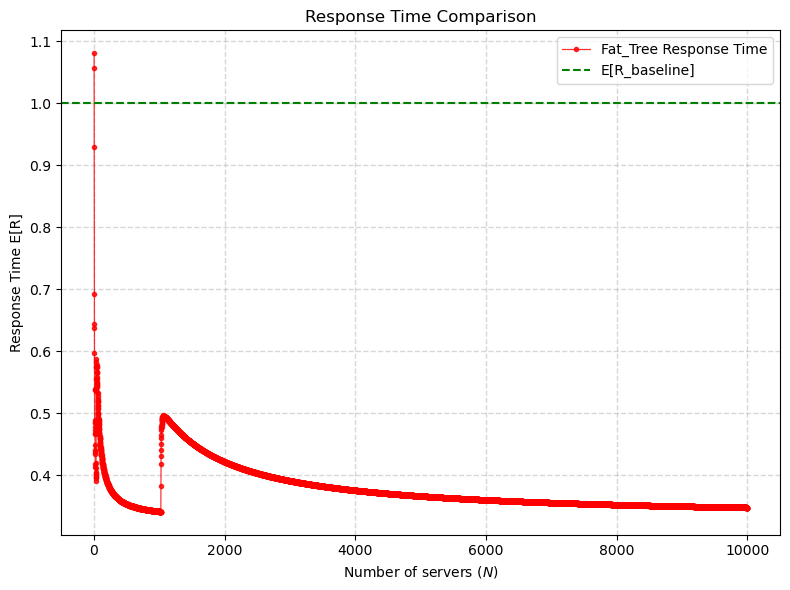

In [22]:
#normalized plot

x = []

for i in range(1,10000+1):
    x.append(i)
    
E_R_normalized = E_R_list/E_R_baseline





plt.figure(figsize = (8,6))
plt.plot(x, E_R_normalized, '.-', color = 'r', linewidth=0.9, alpha=0.8, label='Fat_Tree Response Time')
plt.axhline(y = 1.0, color = 'g', linestyle = '--', label = 'E[R_baseline]')
plt.title("Response Time Comparison")
plt.xlabel("Number of servers ($N$)")
plt.ylabel("Response Time E[R]")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

#plt.ylim(10000, 25000)
# Aggiungi legenda
plt.legend(loc='upper right')

# Mostra il grafico
plt.tight_layout()
plt.show()



In [24]:
#job running cost as a function of N

E_R_array = np.array(E_R_list)
E_theta_array = np.array(E_theta_list)

S = E_R_array + (csi * E_theta_array)

In [25]:
#S_baseline
S_baseline = E_R_baseline + (csi * E_R_baseline)

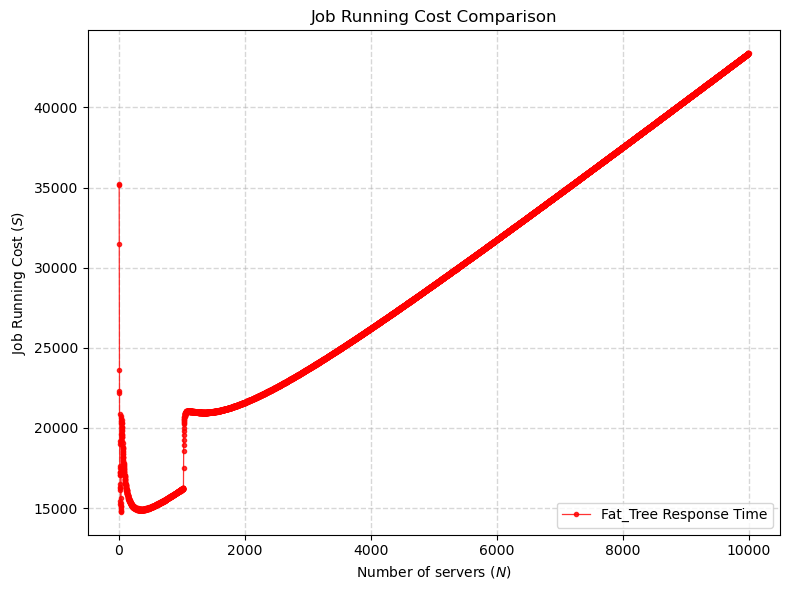

In [27]:
#not normalized plot

x = []

for i in range(1,10000+1):
    x.append(i)
    


plt.figure(figsize = (8,6))
plt.plot(x, S, '.-', color = 'r', linewidth=0.9, alpha=0.8, label='Fat_Tree Response Time')
plt.title("Job Running Cost Comparison")
plt.xlabel("Number of servers ($N$)")
plt.ylabel("Job Running Cost ($S$)")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

#plt.ylim(10000, 25000)
# Aggiungi legenda
plt.legend(loc='lower right')

# Mostra il grafico
plt.tight_layout()
plt.show()


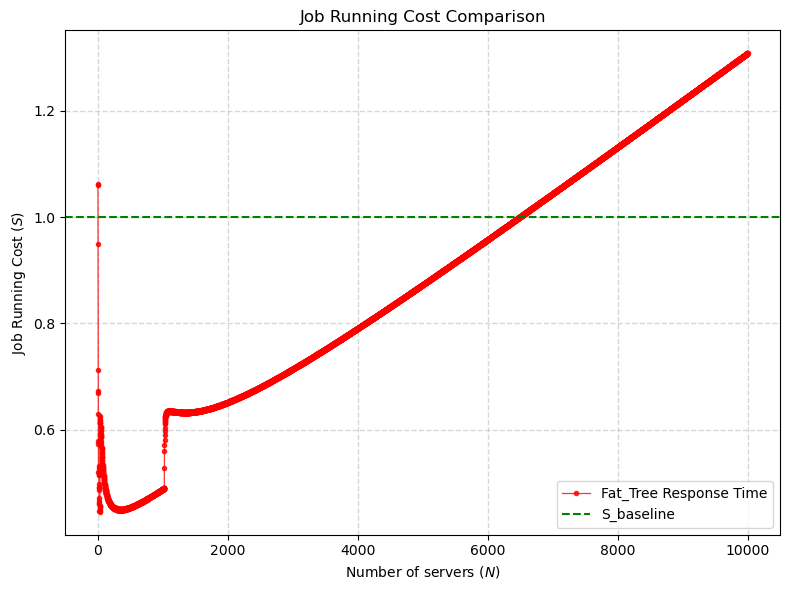

In [29]:
#normalized plot

x = []

for i in range(1,10000+1):
    x.append(i)
    
S_normalized = S/S_baseline



plt.figure(figsize = (8,6))
plt.plot(x, S_normalized, '.-', color = 'r', linewidth=0.9, alpha=0.8, label='Fat_Tree Response Time')
plt.axhline(y = 1.0, color = 'g', linestyle = '--', label = 'S_baseline')
plt.title("Job Running Cost Comparison")
plt.xlabel("Number of servers ($N$)")
plt.ylabel("Job Running Cost ($S$)")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

#plt.ylim(10000, 25000)
# Aggiungi legenda
plt.legend(loc='lower right')

# Mostra il grafico
plt.tight_layout()
plt.show()